In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("SalaryPrediction.csv")

In [4]:
df.head()

,Wage,Age,Club,League,Nation,Position,Apps,Caps
0,"46,427,000",23,PSG,Ligue 1 Uber Eats,FRA,Forward,190,57
1,"42,125,000",30,PSG,Ligue 1 Uber Eats,BRA,Midfilder,324,119
2,"34,821,000",35,PSG,Ligue 1 Uber Eats,ARG,Forward,585,162
3,"19,959,000",31,R. Madrid,La Liga,BEL,Forward,443,120
4,"19,500,000",31,Man UFC,Premier League,ESP,Goalkeeper,480,45


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3907 entries, 0 to 3906
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Wage      3907 non-null   object
 1   Age       3907 non-null   int64 
 2   Club      3907 non-null   object
 3   League    3907 non-null   object
 4   Nation    3907 non-null   object
 5   Position  3907 non-null   object
 6   Apps      3907 non-null   int64 
 7   Caps      3907 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 244.3+ KB


In [6]:
df.tail()

,Wage,Age,Club,League,Nation,Position,Apps,Caps
3902,"3,400",19,Vigo,La Liga,ESP,Defender,0,0
3903,"3,200",18,Famalicao,Primiera Liga,BRA,Goalkeeper,0,0
3904,"2,900",18,Vigo,La Liga,ESP,Forward,0,0
3905,"2,700",18,Vigo,La Liga,ESP,Defender,0,0
3906,"1,400",18,Vigo,La Liga,ESP,Defender,0,0


In [7]:
df.describe()

,Age,Apps,Caps
count,3907.000000,3907.000000,3907.000000
mean,24.120553,140.057077,8.926542
std,4.935638,131.694425,20.518234
min,18.000000,0.000000,0.000000
25%,20.000000,15.000000,0.000000
50%,24.000000,115.000000,0.000000
75%,28.000000,224.500000,6.000000
max,41.000000,715.000000,180.000000


In [8]:
df.isna().sum()

Wage        0
Age         0
Club        0
League      0
Nation      0
Position    0
Apps        0
Caps        0
dtype: int64

In [9]:
df.duplicated().sum()

65

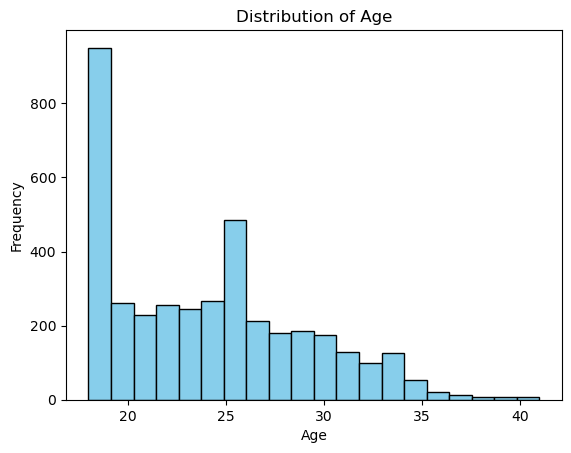

In [10]:
plt.hist(df["Age"],bins = 20, color = "skyblue",edgecolor = "black")
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [11]:
type(df["Wage"][0])

str

In [12]:
df["Wage"] = df["Wage"].replace({",":""}, regex = True).astype(int)

In [13]:
type(df["Wage"][0])

numpy.int64

In [14]:
df.groupby("Position")["Wage"].mean()

Position
Defender      1.299439e+06
Forward       1.342720e+06
Goalkeeper    1.017645e+06
Midfilder     1.603824e+06
Name: Wage, dtype: float64

In [15]:
df["Club"].value_counts()

Club
MRT            64
BRG            61
VIZ            57
Chelsea        54
Gil Vicente    51
               ..
FC Lorient     21
OL             21
AS Monaco      21
PSG            20
Clermont       18
Name: count, Length: 116, dtype: int64

In [16]:
top_nations = df["Nation"].value_counts().head(10)

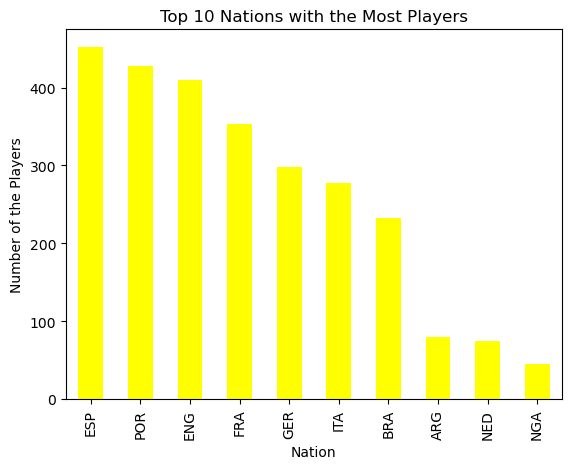

In [17]:
top_nations.plot(kind = "bar",color = "yellow")
plt.title("Top 10 Nations with the Most Players")
plt.xlabel("Nation")
plt.ylabel("Number of the Players")
plt.show()

In [18]:
df["League"].value_counts()

League
Premier League       875
Primiera Liga        747
Serie A              670
La Liga              594
Bundesliga           557
Ligue 1 Uber Eats    464
Name: count, dtype: int64

In [19]:
df.groupby("Club")

In [20]:
top_clubs_average_age = df.groupby("Club")["Age"].mean().nlargest(5)

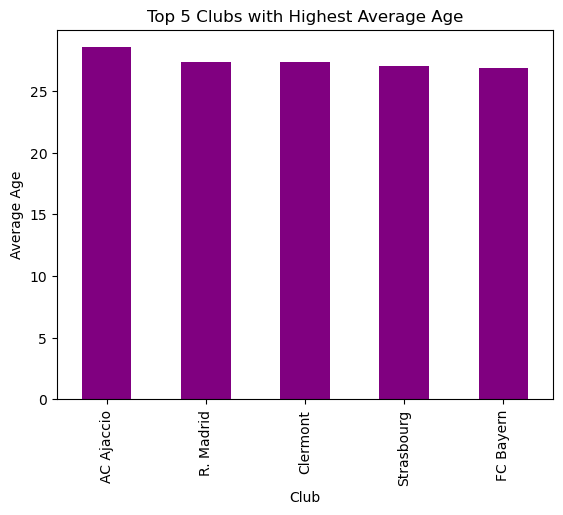

In [21]:
top_clubs_average_age.plot(kind = "bar", color = "purple")
plt.title("Top 5 Clubs with Highest Average Age")
plt.xlabel("Club")
plt.ylabel("Average Age")
plt.show()

In [22]:
league_distribution = df["League"].value_counts()

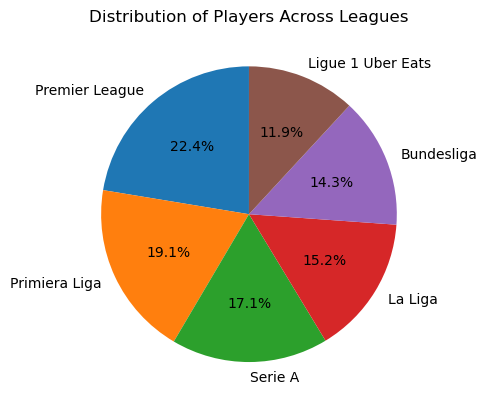

In [23]:
plt.pie(league_distribution, labels = league_distribution.index, autopct = "%1.1f%%",startangle = 90)
plt.title("Distribution of Players Across Leagues")
plt.show()

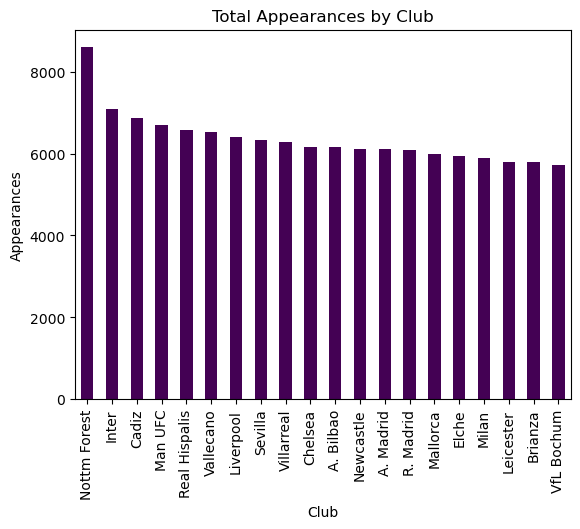

In [24]:
club_apps = df.groupby("Club")["Apps"].sum().sort_values(ascending=False).head(20)
club_apps.plot(kind = "bar",stacked=True,colormap = "viridis")
plt.title("Total Appearances by Club")
plt.xlabel("Club")
plt.ylabel("Appearances")
plt.show()

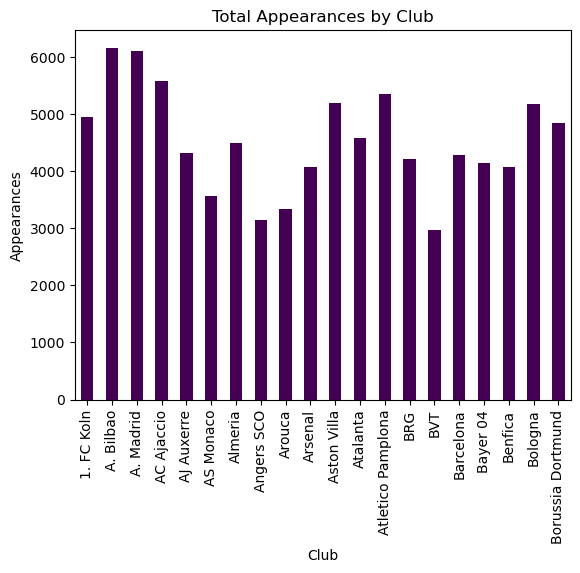

In [25]:
club_apps = df.groupby("Club")["Apps"].sum().head(20)
club_apps.plot(kind = "bar",stacked=True,colormap = "viridis")
plt.title("Total Appearances by Club")
plt.xlabel("Club")
plt.ylabel("Appearances")
plt.show()

In [26]:
df

,Wage,Age,Club,League,Nation,Position,Apps,Caps
0,46427000,23,PSG,Ligue 1 Uber Eats,FRA,Forward,190,57
1,42125000,30,PSG,Ligue 1 Uber Eats,BRA,Midfilder,324,119
2,34821000,35,PSG,Ligue 1 Uber Eats,ARG,Forward,585,162
3,19959000,31,R. Madrid,La Liga,BEL,Forward,443,120
4,19500000,31,Man UFC,Premier League,ESP,Goalkeeper,480,45
...,...,...,...,...,...,...,...,...
3902,3400,19,Vigo,La Liga,ESP,Defender,0,0
3903,3200,18,Famalicao,Primiera Liga,BRA,Goalkeeper,0,0
3904,2900,18,Vigo,La Liga,ESP,Forward,0,0
3905,2700,18,Vigo,La Liga,ESP,Defender,0,0


In [27]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()
df["League"] = labelencoder.fit_transform(df["League"])

In [28]:
df

,Wage,Age,Club,League,Nation,Position,Apps,Caps
0,46427000,23,PSG,2,FRA,Forward,190,57
1,42125000,30,PSG,2,BRA,Midfilder,324,119
2,34821000,35,PSG,2,ARG,Forward,585,162
3,19959000,31,R. Madrid,1,BEL,Forward,443,120
4,19500000,31,Man UFC,3,ESP,Goalkeeper,480,45
...,...,...,...,...,...,...,...,...
3902,3400,19,Vigo,1,ESP,Defender,0,0
3903,3200,18,Famalicao,4,BRA,Goalkeeper,0,0
3904,2900,18,Vigo,1,ESP,Forward,0,0
3905,2700,18,Vigo,1,ESP,Defender,0,0


In [29]:
X = df.iloc[:,:-1]

In [30]:
X

,Wage,Age,Club,League,Nation,Position,Apps
0,46427000,23,PSG,2,FRA,Forward,190
1,42125000,30,PSG,2,BRA,Midfilder,324
2,34821000,35,PSG,2,ARG,Forward,585
3,19959000,31,R. Madrid,1,BEL,Forward,443
4,19500000,31,Man UFC,3,ESP,Goalkeeper,480
...,...,...,...,...,...,...,...
3902,3400,19,Vigo,1,ESP,Defender,0
3903,3200,18,Famalicao,4,BRA,Goalkeeper,0
3904,2900,18,Vigo,1,ESP,Forward,0
3905,2700,18,Vigo,1,ESP,Defender,0


In [31]:
y = df.iloc[:,-1]

In [32]:
y

0        57
1       119
2       162
3       120
4        45
       ... 
3902      0
3903      0
3904      0
3905      0
3906      0
Name: Caps, Length: 3907, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [34]:
X_train

,Wage,Age,Club,League,Nation,Position,Apps
1226,1103000,31,Spezia,5,NED,Goalkeeper,293
2126,299000,21,Almeria,1,ESP,Midfilder,37
389,3640000,33,Nottm Forest,3,BRA,Defender,264
2292,224000,39,Strasbourg,2,JPN,Goalkeeper,397
2866,78500,23,VIZ,4,POR,Midfilder,60
...,...,...,...,...,...,...,...
2557,135000,26,Gil Vicente,4,IRN,Forward,272
2609,130000,19,Liverpool,3,POL,Goalkeeper,31
931,1595000,26,Empoli,5,ROU,Midfilder,252
268,4940000,25,West Ham,3,GER,Defender,155


In [35]:
X_test

,Wage,Age,Club,League,Nation,Position,Apps
1939,408000,31,Mallorca,1,FRA,Midfilder,209
474,3190000,27,Brianza,5,ITA,Midfilder,197
3004,65500,26,P. Ferreira,4,POR,Defender,173
425,3439000,24,Borussia Dortmund,0,TUR,Midfilder,166
1767,534000,31,Atletico Pamplona,1,CRO,Forward,359
...,...,...,...,...,...,...,...
1940,408000,34,Mallorca,1,ESP,Defender,412
2374,181000,20,Udinese,5,IRL,Defender,40
2191,269000,26,Empoli,5,NGA,Defender,136
3272,37000,19,BRG,4,POR,Defender,0


In [36]:
X_train

,Wage,Age,Club,League,Nation,Position,Apps
1226,1103000,31,Spezia,5,NED,Goalkeeper,293
2126,299000,21,Almeria,1,ESP,Midfilder,37
389,3640000,33,Nottm Forest,3,BRA,Defender,264
2292,224000,39,Strasbourg,2,JPN,Goalkeeper,397
2866,78500,23,VIZ,4,POR,Midfilder,60
...,...,...,...,...,...,...,...
2557,135000,26,Gil Vicente,4,IRN,Forward,272
2609,130000,19,Liverpool,3,POL,Goalkeeper,31
931,1595000,26,Empoli,5,ROU,Midfilder,252
268,4940000,25,West Ham,3,GER,Defender,155


In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_test = scaler.fit_transform(X_test)
scaled_X_train = scaler.fit_transform(X_train)

ValueError: could not convert string to float: 'Mallorca'

In [ ]:
scaled_X_test

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
def modelresults(predictions):
    print("Mean absolute error on model is {}".format(mean_absolute_error(y_test, predictions)))
    print("Root mean squared error on model is {}".format(np.sqrt(mean_sqaured_error(y_test,predictions)))) 

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(scaled_X_train,X_train)

In [ ]:
preslr = lr.predict(scaled_X_test)

In [ ]:
modelresults(preslr)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [ ]:
svrmodel = SVR()

In [ ]:
param_gridsvr = {"C" : [0.01,0.1,0.5],"kernel":["linear","rbf","polt"],"degree":[2,3,4]}

In [ ]:
gridsvr = GridSearchCV(svrmodel,param_gridsvr)

In [ ]:
gridsvr.fit(scaled_X_train, y_train)

In [ ]:
print("Best parameters for model is {}".format(gridsvr.best_params_)

In [ ]:
predsgridsvr = gridsvr.predict(scaled_X_test)

In [ ]:
modelresults(predsgridsvr)

In [ ]:
from sklearn.ensemble import RandomForestRegressor()

In [ ]:
rfrmodel = RandomForestRegressor()

In [ ]:
param_gridrfr = {"max_depth" : [5,10,15],"max_features":["a"]}